In [1]:
import os
from datetime import datetime

import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Select latest data file
folder = '../data/'
files = [file for file in os.listdir(folder) if not file.startswith('.~lock')]
most_recent_data_file = max(files, key=lambda x: datetime.strptime(x.split('-')[0] + x.split('-')[1] + x.split('-')[2] + " " + x.split('-')[3] + ":" + x.split('-')[4] + ":" + x.split('-')[5], '%Y%m%d %H:%M:%S'))
data_file = folder + most_recent_data_file
print("Data file: {}".format(data_file))

Data file: ../data/2024-10-11-14-23-48-data-up-to-865042-K-208-chi-4032-k-323-completed.json


In [3]:
# Load data into DataFrame
with open(data_file, 'r') as data_file:
    data = json.load(data_file)
df = pd.DataFrame(data)

In [4]:
# Is df[COLUMN] monotonically increasing?
print("Is df[COLUMN] monotonically increasing?\n")
print(f"df['timestamp']     {str(df['timestamp'].is_monotonic_increasing):5}. Should be False")
print(f"df['proof_score']   {str(df['proof_score'].is_monotonic_increasing):5}. Should be False.")
print(f"df['proof_size']    {str(df['proof_size'].is_monotonic_increasing):5}. Should be False.")
print(f"df['target']        {str(df['target'].is_monotonic_decreasing):5}. Should be False.")

Is df[COLUMN] monotonically increasing?

df['timestamp']     False. Should be False
df['proof_score']   False. Should be False.
df['proof_size']    False. Should be False.
df['target']        False. Should be False.


In [5]:
# Add block height (index) as column
df["height"] = df.index + 1

In [6]:
# Create datetime objects column from timestamps column
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='s')
df

,target,proof_size,proof_score,timestamp,height,timestamp_dt
0,2695953529101130949315647634472399133601089873...,1,1,1231006505,1,2009-01-03 18:15:05
1,2695953529101130949315647634472399133601089873...,2,2,1231469665,2,2009-01-09 02:54:25
2,2695953529101130949315647634472399133601089873...,3,3,1231469744,3,2009-01-09 02:55:44
3,2695953529101130949315647634472399133601089873...,4,4,1231470173,4,2009-01-09 03:02:53
4,2695953529101130949315647634472399133601089873...,5,5,1231470988,5,2009-01-09 03:16:28
...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,7078,568293691178182364,1728572242,865039,2024-10-10 14:57:22
865039,2928805436162009520992638294218449682899899138...,7077,568206797443176909,1728572873,865040,2024-10-10 15:07:53
865040,2928805436162009520992638294218449682899899138...,7078,568298847037725394,1728573656,865041,2024-10-10 15:20:56
865041,2928805436162009520992638294218449682899899138...,7076,568122481637942969,1728574093,865042,2024-10-10 15:28:13


In [7]:
df.dtypes

target                  object
proof_size               int64
proof_score              int64
timestamp                int64
height                   int64
timestamp_dt    datetime64[ns]
dtype: object

In [8]:
# DataFrame description
df.describe()

,proof_size,proof_score,timestamp,height,timestamp_dt
count,865043.000000,8.650430e+05,8.650430e+05,865043.000000,865043
mean,6868.301546,7.509737e+16,1.478748e+09,432522.000000,2016-11-10 03:15:25.081351680
min,1.000000,1.000000e+00,1.231007e+09,1.000000,2009-01-03 18:15:05
25%,6739.000000,1.962662e+10,1.358011e+09,216261.500000,2013-01-12 17:18:25.500000
50%,6976.000000,1.380875e+15,1.475408e+09,432522.000000,2016-10-02 11:27:17
75%,7114.000000,1.054927e+17,1.600365e+09,648782.500000,2020-09-17 17:42:05.500000
max,7440.000000,5.731516e+17,1.728574e+09,865043.000000,2024-10-10 15:30:23
std,474.652823,1.320413e+17,1.410821e+08,249716.548793,NaN


/tmp/ipykernel_25096/620208664.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


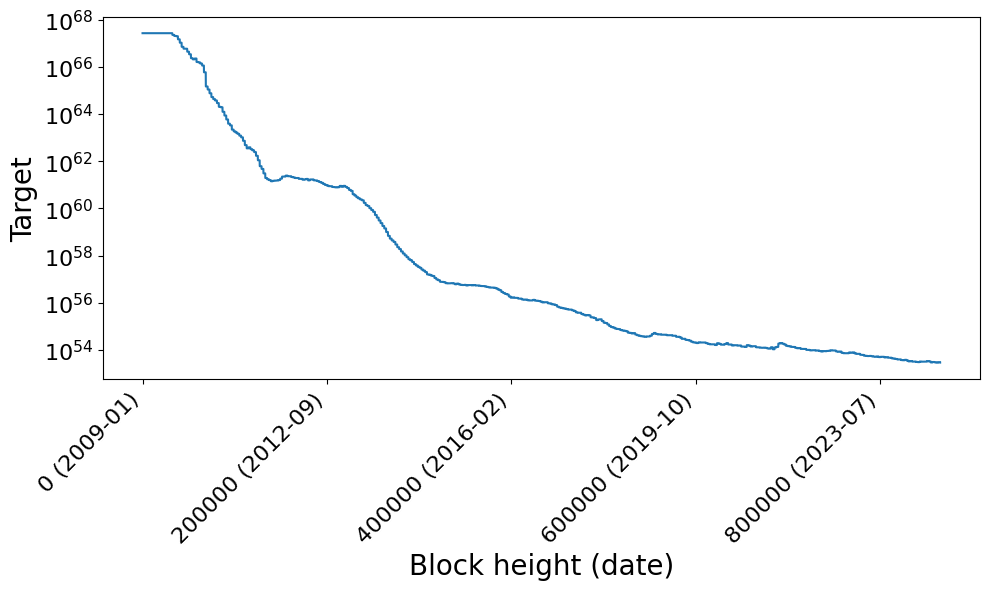

In [9]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['target'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Target', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("target-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_25096/2860352326.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


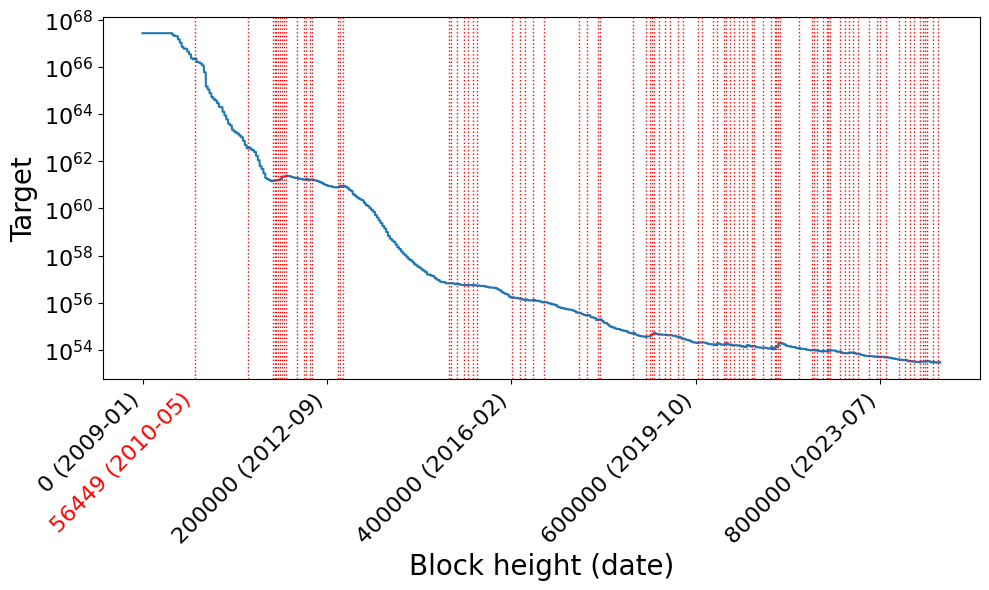

In [10]:
# Plot target over time with target increases
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['target'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Target', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

# Add vertical red lines when target increases
prev_target = None
first_red_line_label = False
for i, target in enumerate(df['target']):
    if prev_target is not None and target > prev_target:
        # print(df.iloc[i]['height']) # print block heights of red lines
        plt.axvline(x=df.iloc[i]['height'], color='red', linestyle=':', linewidth=1)
        if not first_red_line_label:
            plt.text(df.iloc[i]['height'], -0.025, f"{df.iloc[i]['height']} ({df.iloc[i]['timestamp_dt'].strftime('%Y-%m')})", transform=plt.gca().get_xaxis_transform(), ha='right', va='top', rotation=45, color='red', size=16)
            first_red_line_label = True
    prev_target = target

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("target-variation-over-time-with-drops.pdf", format="pdf")
plt.show()

/tmp/ipykernel_25096/3764209552.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


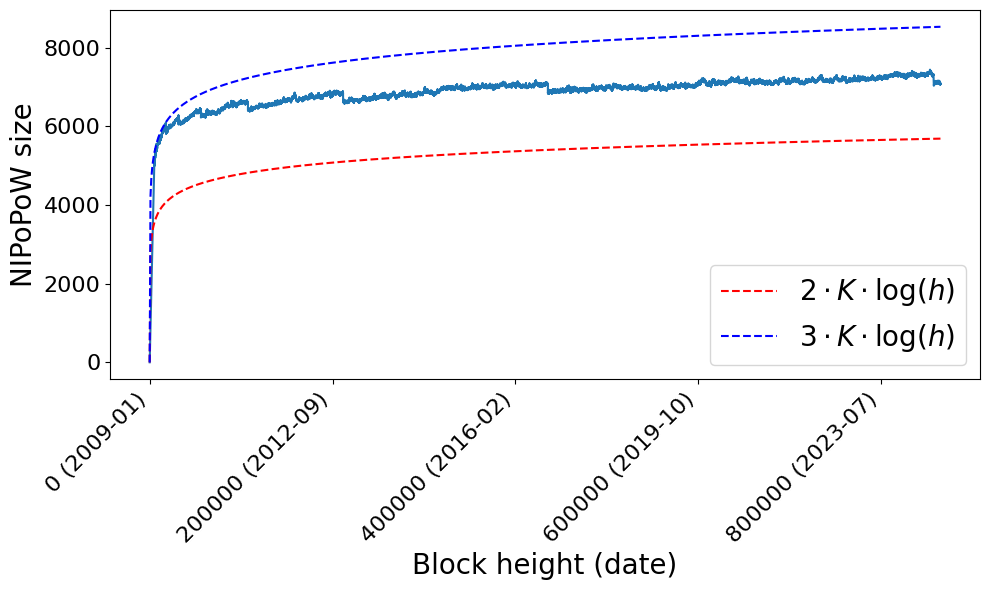

In [14]:
import numpy as np

K = 208

# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_size'], estimator=None, sort=False)

# Add lines for functions 2*K*log(x) and 3*K*log(x)
x_vals = np.linspace(df['height'].min(), df['height'].max(), 1000)  # Generate x values (block heights) for the log functions
y_vals_1 = 2 * K * np.log(x_vals)  # 2 * K * log(x)
y_vals_2 = 3 * K * np.log(x_vals)  # 3 * K * log(x)

# Use LaTeX notation with K in the label
plt.plot(x_vals, y_vals_1, label=r'$2 \cdot K \cdot \log(h)$', linestyle='--', color='red')
plt.plot(x_vals, y_vals_2, label=r'$3 \cdot K \cdot \log(h)$', linestyle='--', color='blue')

plt.xlabel('Block height (date)', size=20)
plt.ylabel('NIPoPoW size', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)

corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])

new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.legend(fontsize=20, loc='lower right')
plt.tight_layout()
plt.savefig("proof-size-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_25096/1557901075.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


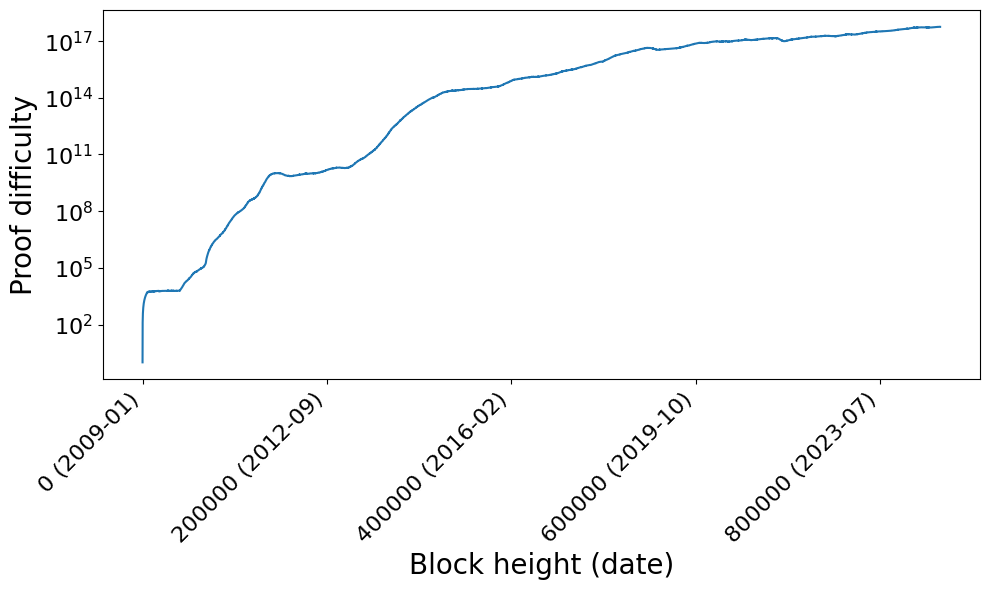

In [12]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_score'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Proof difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-difficulty-variation-over-time-logscale.pdf", format="pdf")
plt.show()

/tmp/ipykernel_25096/2954408213.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


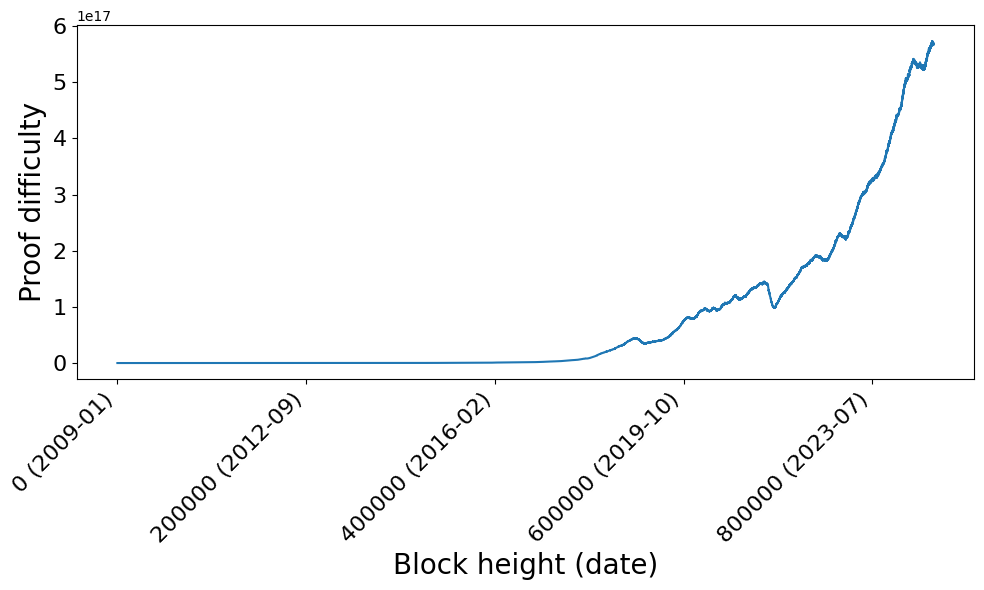

In [13]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_score'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Proof difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(False)
plt.tight_layout()
plt.savefig("proof-difficulty-variation-over-time.pdf", format="pdf")
plt.show()